In [35]:
import pandas as pd
import seaborn as sns

In [109]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data Cleaning

In [3]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [4]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [5]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

#### Since there are 17 and 15 unique values in the Product_Category 2 & 3 . Imputing the them makes no sense in context of the Null values, so it's better if we drop the columns.
##### Imputing can change the context of the Real Data.(In my thought).

In [6]:
del df['Product_Category_2']
del df['Product_Category_3']
# # Deleting the columns

In [7]:
df.duplicated().sum()

0

## Analyzing the Columns

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
df['User_ID'].nunique() # Total no of Unique Customers 

5891

In [10]:
df['Product_ID'].nunique() # Total no of Unique Products 

3623

In [11]:
df['Age'].unique() # Age ranges

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['City_Category'].unique() # Unique city categories

array(['A', 'C', 'B'], dtype=object)

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['Marital_Status'].unique() # 0 for unmarried and 1 for married

array([0, 1], dtype=int64)

In [15]:
df['Occupation'].unique() # every code represent certain occupation

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Purchase'].sum() # Total sales amount

5017668378

In [18]:
df['Purchase'].sum()/len(df['Purchase']) # Avg sales amount per person

9333.859852635065

In [19]:
df['Purchase'].nunique() # Total No of sales

17959

In [20]:
for col in df.columns:
    print(col,':',df[col].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


## Analysing Gender

In [21]:
data = pd.DataFrame({'Ratio' :[len(df[df['Gender'] == 'M']),len(df[df['Gender'] == 'F'])]}, index=['Male','Female'])

<Axes: ylabel='Ratio'>

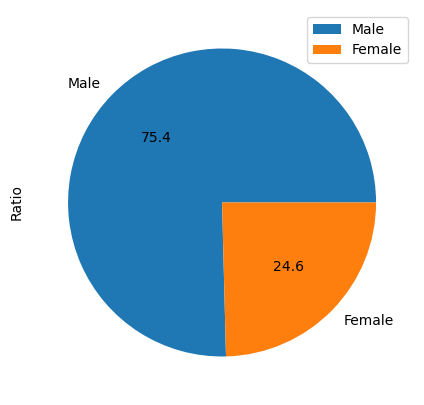

In [22]:
data.plot.pie(y = 'Ratio',figsize= (5,5),autopct = '%.1f')

#### It's clear from the pie chart that Ratio is 3:1 i.e. Male is having more purchasing power.

### Alternate way(kind of easy)

<Axes: title={'center': 'Gender Ratio'}>

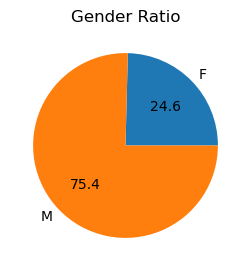

In [23]:
df.groupby(by = 'Gender').size().plot.pie(autopct = '%.1f',figsize = (3,3),title = 'Gender Ratio')

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

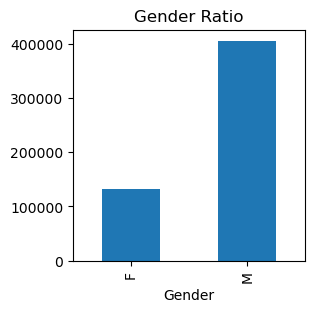

In [24]:
df.groupby(by = 'Gender').size().plot.bar(figsize = (3,3),title = 'Gender Ratio')

### Analysing how much money they have spend?

<Axes: ylabel='Purchase'>

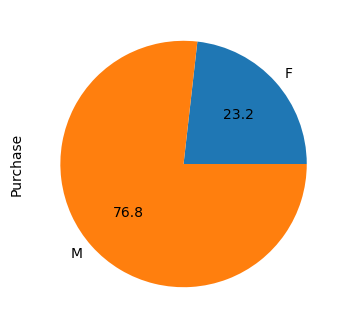

In [25]:
df.groupby('Gender')['Purchase'].sum().plot(kind = 'pie',autopct ='%.1f',figsize = (4,4))

#### Their avg spending

<Axes: ylabel='Purchase'>

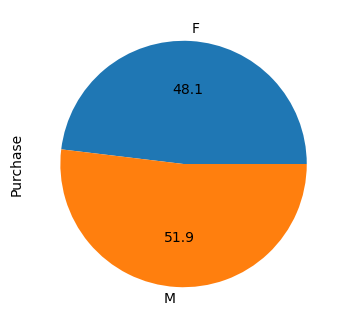

In [26]:
df.groupby('Gender')['Purchase'].mean().plot(kind = 'pie',autopct ='%.1f',figsize = (4,4))

#### Male and Female both are spending same amount of money per Product.

## Analysing Age and Maritial Status

<Axes: title={'center': 'Purchase Distributon by Age'}, xlabel='Age'>

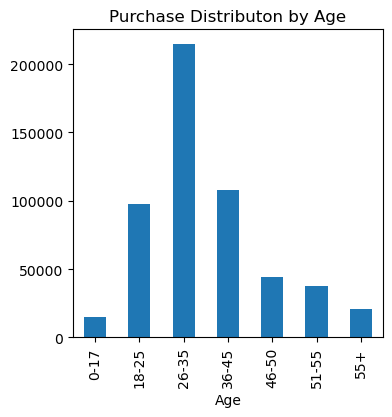

In [27]:
df.groupby('Age').size().plot(kind = 'bar',figsize = (4,4),title = 'Purchase Distributon by Age')

#### Most of the purchase(Products) is done by Age[18-45].
#### Products can be same.

#### How Many unique products are purchased by person?

In [28]:
lst = []
for i in df['Age'].unique():
    lst.append([i,df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst,columns=['Age','Product'])
data

,Age,Product
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: title={'center': 'Unique Product Purchase Distribution by Age'}, xlabel='Age'>

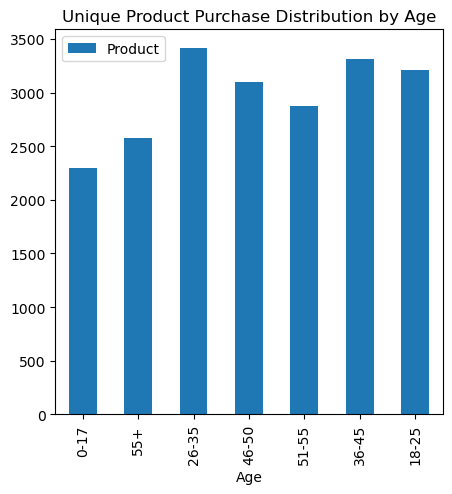

In [29]:
data.plot(kind ='bar', x = 'Age', figsize = (5,5),title ='Unique Product Purchase Distribution by Age')

#### Amount Spend By each Age Category

<Axes: title={'center': 'Amount Spend Distributon by Age'}, xlabel='Age'>

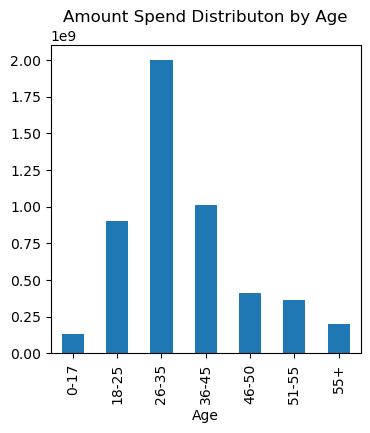

In [30]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar',figsize = (4,4),title = 'Amount Spend Distributon by Age')

#### This correlates with Purchase by Each Age Category

#### Avg Amount Spend by each Age Category

<Axes: title={'center': 'Avg Amount Spend per Product Distributon by Age'}, ylabel='Purchase'>

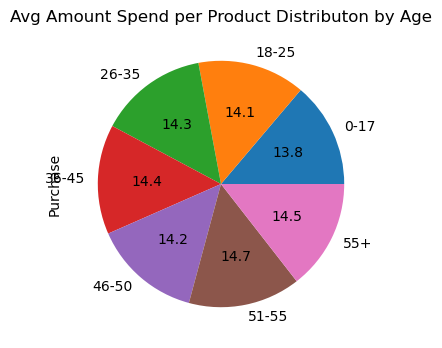

In [31]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie',autopct = '%.1f' ,figsize = (4,4),title = 'Avg Amount Spend per Product Distributon by Age')

#### Every Age Category almost spends Same Amount per Product range but 51-55 spends most than the others.

### Analysing Marital Status

<Axes: ylabel='User_ID'>

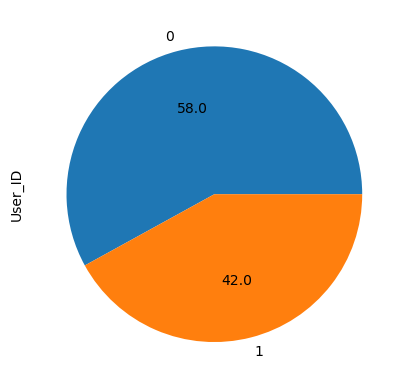

In [32]:
df.groupby('Marital_Status')['User_ID'].nunique().plot.pie(autopct = '%.1f')

#### 58% of the Customers(Unique) are unmarried(or something else) and 40% are married

<Axes: title={'center': 'Purchase Distribution by Marital Status'}, ylabel='Purchase'>

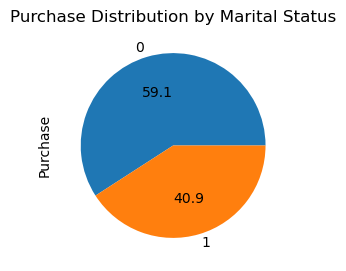

In [33]:
df.groupby(by = 'Marital_Status')['Purchase'].size().plot.pie(autopct ='%.1f',figsize = (3,3),title = 'Purchase Distribution by Marital Status')

#### Unmarried are spending more than married ones.

#### Avg Amount Spend by Marital Status

<Axes: title={'center': 'Avg Amount Spend by Marital Status'}, ylabel='Purchase'>

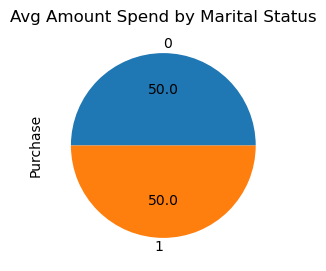

In [34]:
df.groupby(by = 'Marital_Status')['Purchase'].mean().plot.pie(autopct ='%.1f',figsize = (3,3),title = 'Avg Amount Spend by Marital Status')

## Mutlicolumn Analysis(Age,Gender,Marital_Status)

<Axes: xlabel='Age', ylabel='count'>

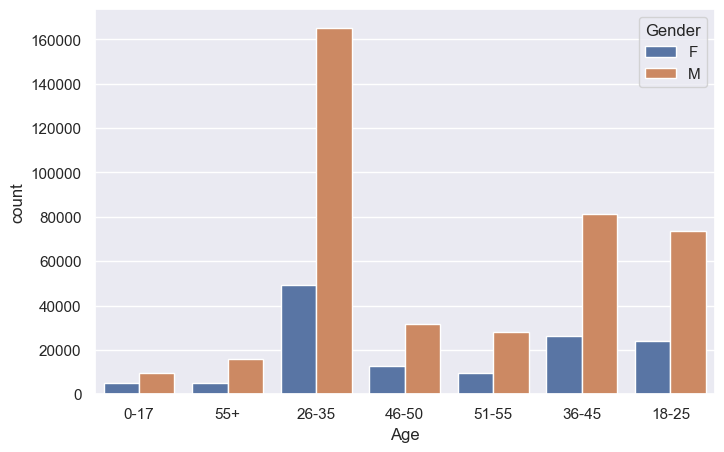

In [41]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x ='Age',hue='Gender',data = df) # we used countplot because we want to see age in gender category.

#### From the above fig, we can say that Male has more Purchasing power than Female in each Age Category.

<Axes: xlabel='Age', ylabel='count'>

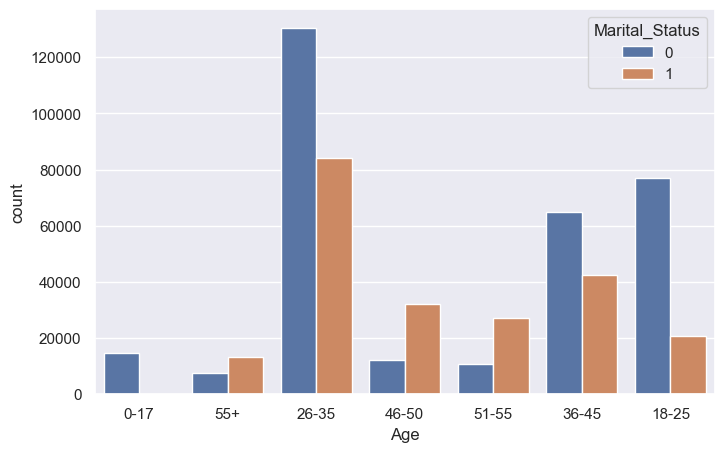

In [42]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x ='Age',hue='Marital_Status',data = df)

#### Unmarried people are spending in age below 45.

<Axes: xlabel='Marital_Status', ylabel='count'>

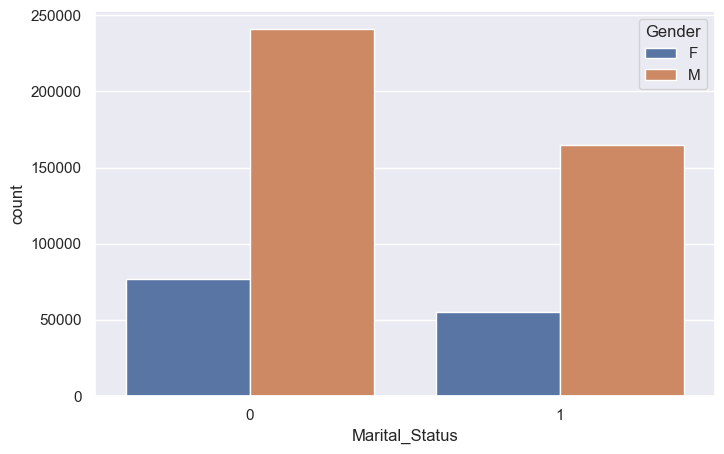

In [43]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x ='Marital_Status',hue='Gender',data = df)

#### This again confirms that Male has more Purchasing Power even if there are Married or Unmaried.

## Analysing City_Category

<Axes: xlabel='City_Category', ylabel='count'>

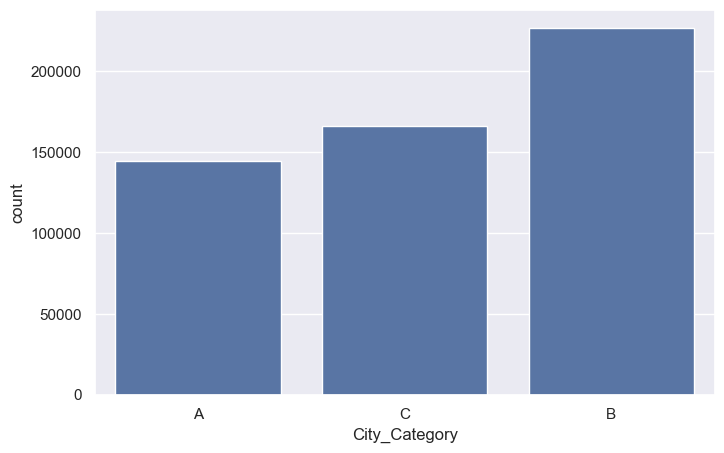

In [45]:
sns.countplot(data = df, x = 'City_Category')

#### B area of the city's population is spending more than C and than A.

<Axes: title={'center': 'Purchase Distribution by City_Category'}>

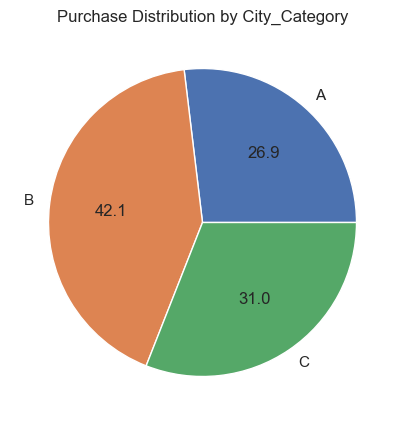

In [47]:
# Through Pie chart
df.groupby('City_Category').size().plot.pie(autopct = '%.1f',title = 'Purchase Distribution by City_Category')

<Axes: xlabel='Age', ylabel='count'>

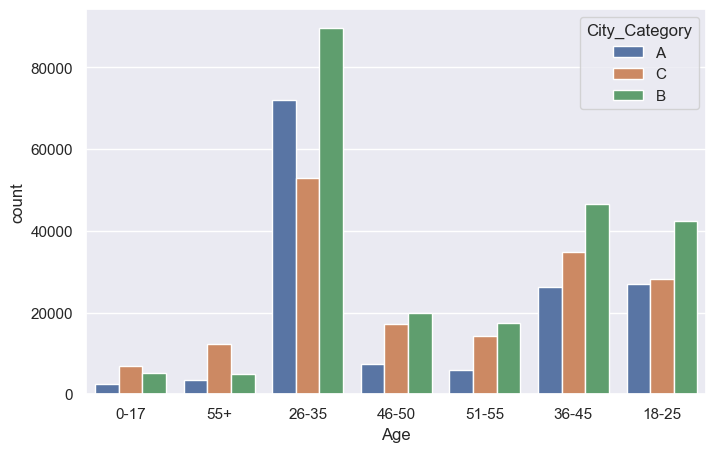

In [49]:
sns.countplot(x='Age',hue='City_Category',data = df)

#### People of Age 26-35 are spending most in all the City Categories but A's People are spending morethan C here.

<Axes: xlabel='City_Category', ylabel='count'>

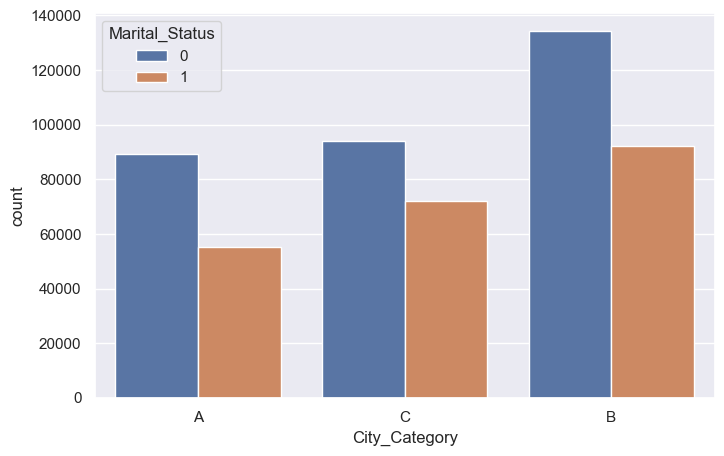

In [51]:
sns.countplot(x='City_Category',hue = 'Marital_Status',data = df)

<Axes: xlabel='City_Category', ylabel='count'>

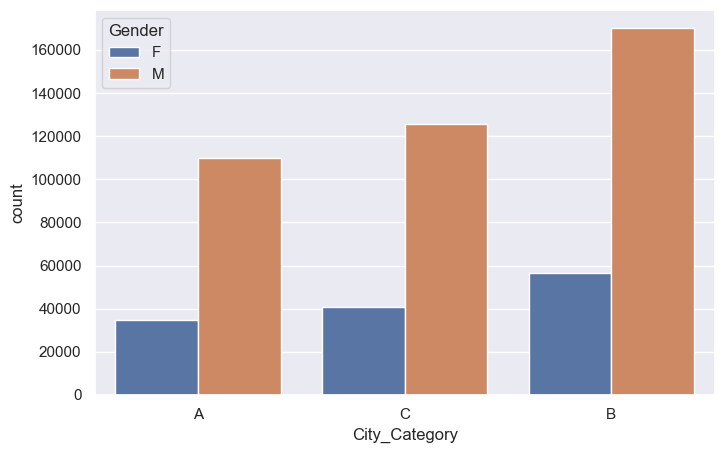

In [52]:
sns.countplot(x='City_Category',hue = 'Gender',data = df)

<Axes: title={'center': 'Purchase(Amount sum) Distribution By City_Category'}, ylabel='Purchase'>

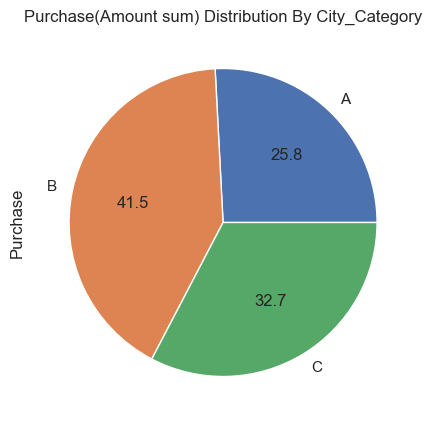

In [62]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie', autopct = '%.1f', title = 'Purchase(Amount sum) Distribution By City_Category')

In [ ]:
#### In terms of Sum B's people are spending more than C and than B's People spending least.

<Axes: title={'center': 'Avg Money Spend per Product By City_Category'}, ylabel='Purchase'>

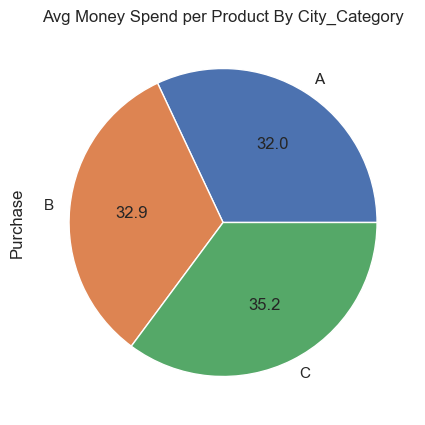

In [63]:
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie', autopct = '%.1f', title = 'Avg Money Spend per Product By City_Category')

#### But in terms of Avg Spending, Here Story is different A'people are buying more Expensive things than B(but fewer Products) and C'people are little buying more expensive ones.

## Occupation and Product Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

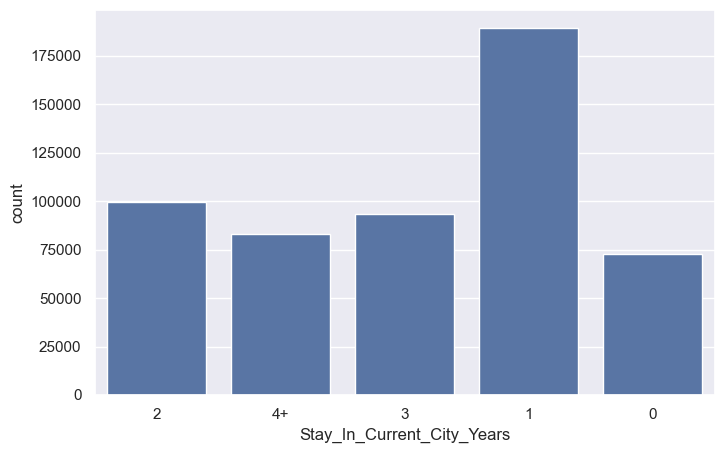

In [65]:
sns.countplot( x=df['Stay_In_Current_City_Years'])

<Axes: >

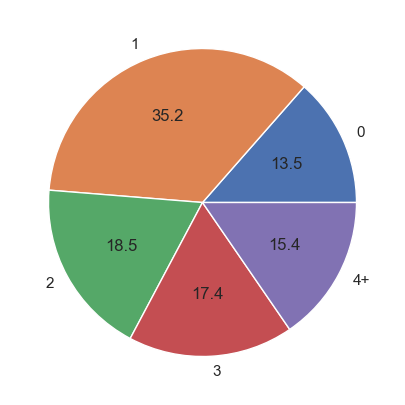

In [70]:
df.groupby('Stay_In_Current_City_Years').size().plot.pie(autopct = '%.1f')

#### This shows that the people spending more are newbies(35%) in the City

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

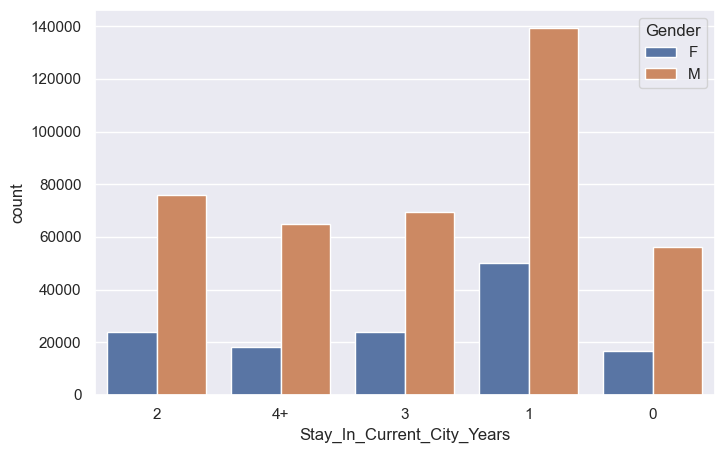

In [66]:
sns.countplot(x='Stay_In_Current_City_Years', hue = 'Gender',data = df)

#### They are Male newbies who are spending more.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

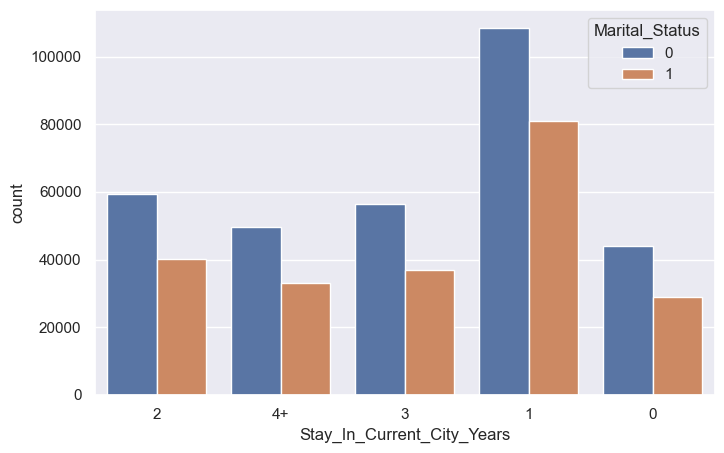

In [67]:
sns.countplot(x='Stay_In_Current_City_Years', hue = 'Marital_Status',data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

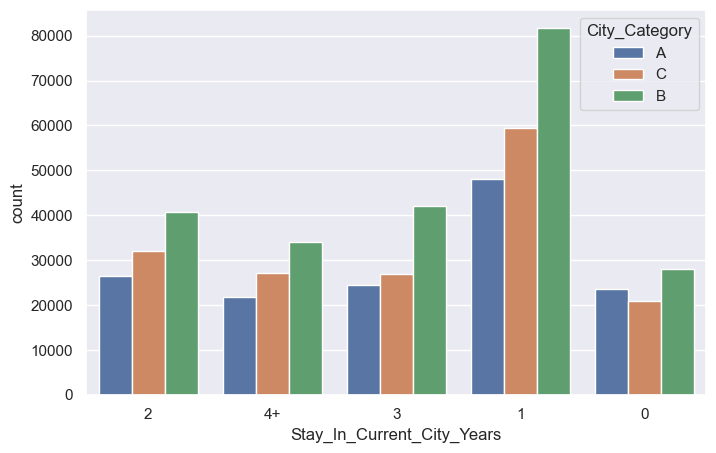

In [68]:
sns.countplot(x='Stay_In_Current_City_Years', hue = 'City_Category',data = df)

<Axes: xlabel='Age', ylabel='count'>

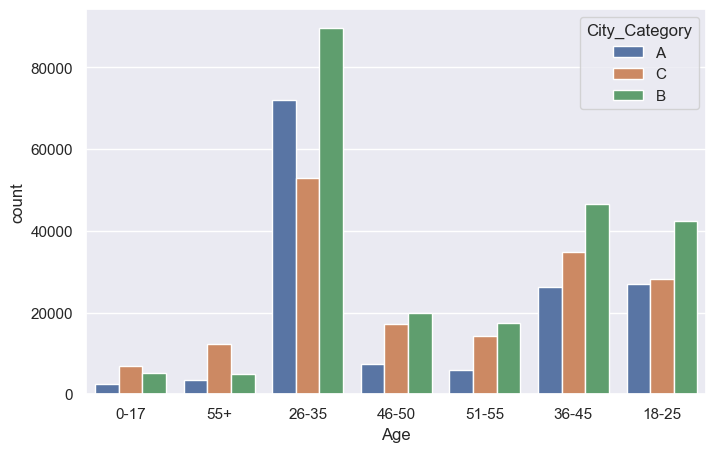

In [69]:
sns.countplot(x='Age', hue = 'City_Category',data = df)

## The people we should target are unmarried male newbies(1 year) in the City(B and C's Area people) with Age 26-35 for maximum output

<Axes: title={'center': 'Purchase(Amount sum) Distribution By Stay_In_Current_City_Years'}, xlabel='Stay_In_Current_City_Years'>

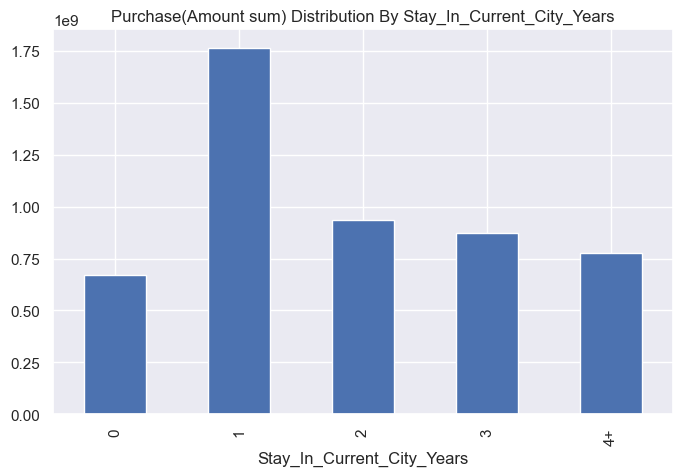

In [72]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'bar',  title = 'Purchase(Amount sum) Distribution By Stay_In_Current_City_Years')

<Axes: title={'center': 'Avg Ammount Spend Distribution By Stay_In_Current_City_Years'}, xlabel='Stay_In_Current_City_Years'>

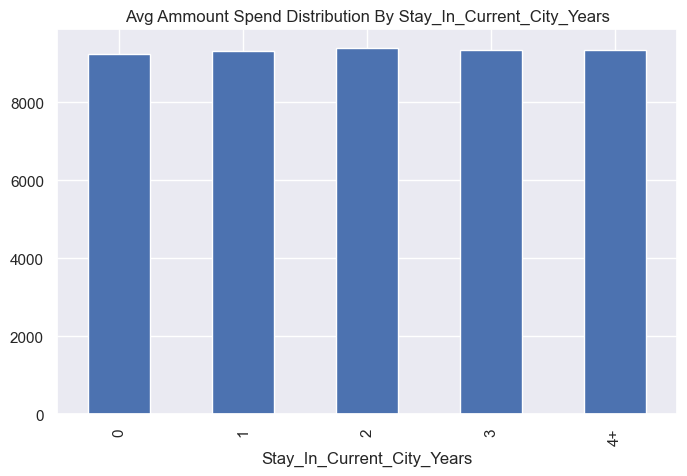

In [73]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind = 'bar',  title = 'Avg Ammount Spend Distribution By Stay_In_Current_City_Years')

#### The avg spending amount is kind of same for everyone here but the Newbies(1year) are spending more.

### Analysing with Occupation

<Axes: xlabel='Occupation', ylabel='count'>

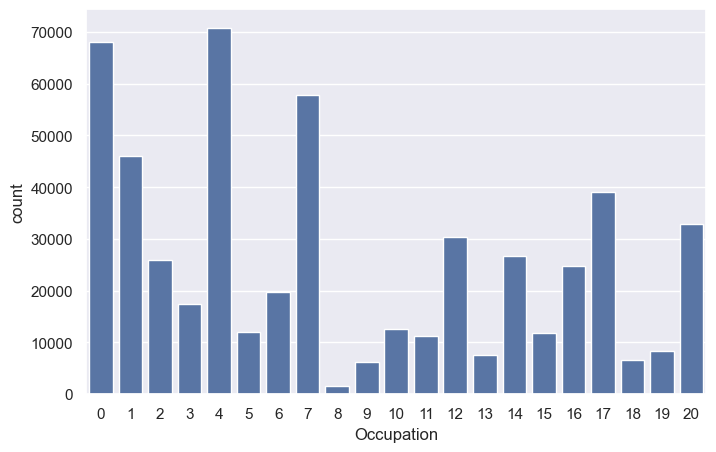

In [75]:
sns.countplot(x = df['Occupation'])

#### Shows People with Occupation 4,0,7 are buying more Products.

<Axes: title={'center': 'Purchase(Product) Distribution by Occupation'}, xlabel='Occupation'>

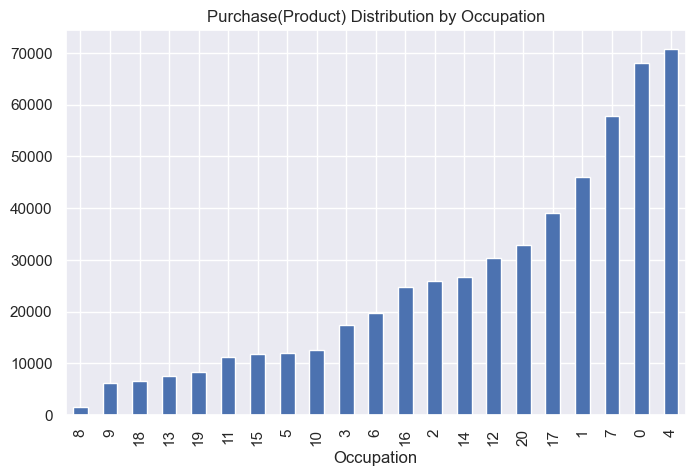

In [84]:
df.groupby('Occupation')['Purchase'].size().sort_values().plot.bar(title ='Purchase(Product) Distribution by Occupation')

<Axes: title={'center': 'Purchase(Amount) Distribution by Occupation'}, xlabel='Occupation'>

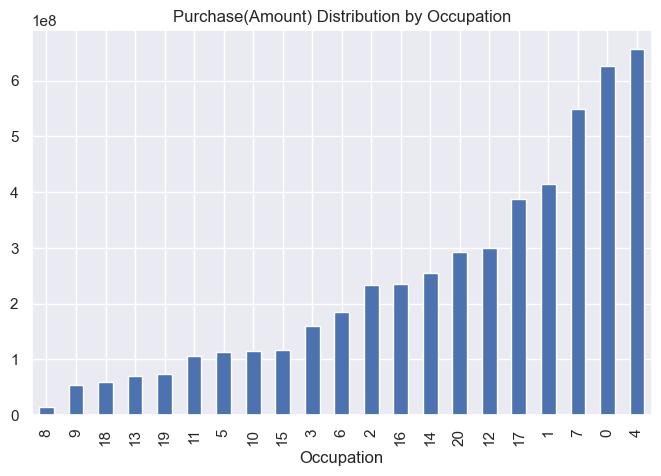

In [86]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot.bar(title ='Purchase(Amount) Distribution by Occupation')

#### Shows the same thing 4,0,7 are spending more amount.

<Axes: title={'center': 'Avg Money Spend by Occupation'}, xlabel='Occupation'>

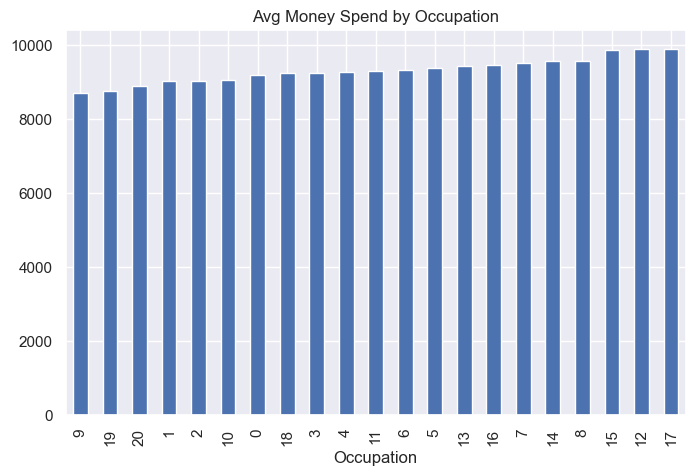

In [87]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot.bar(title = 'Avg Money Spend by Occupation')

### But this shows that People with Occupation 17,12,15 are buying more expensive but less Products and 4,0,7 are buying Products with avg price more
### That means 17,12,15 are buying more expensive Products Comparatively than others.

<Axes: xlabel='Occupation', ylabel='count'>

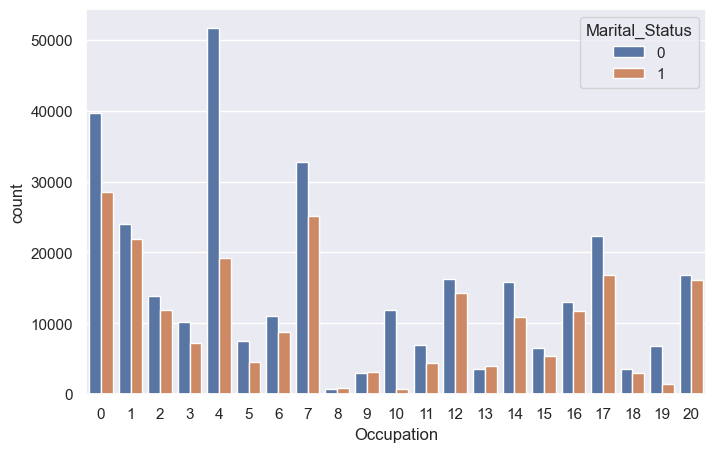

In [88]:
sns.countplot(x = 'Occupation',hue= 'Marital_Status',data = df)

#### Here Most people with occupation 4,0,7 are Unmarried Males 

<Axes: xlabel='Occupation', ylabel='count'>

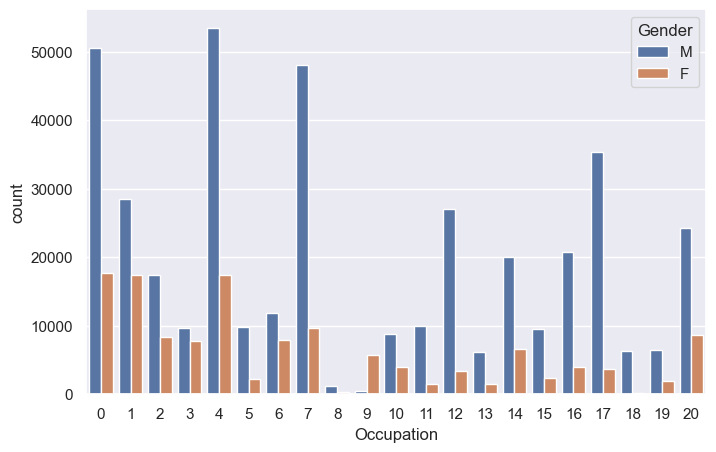

In [90]:
sns.countplot(x = 'Occupation',hue= 'Gender',data = df)

#### Most the people are Male in almost every Occupation except 9

### With Product_ID

<Axes: xlabel='Occupation'>

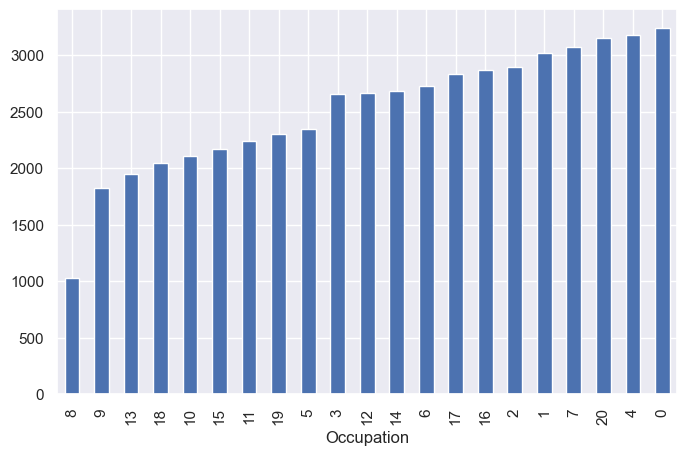

In [92]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot.bar()

### This gives us clear insight that 0 and 4 are buying many products(unique ones).

### With Product_Category_1

<Axes: xlabel='Product_Category_1'>

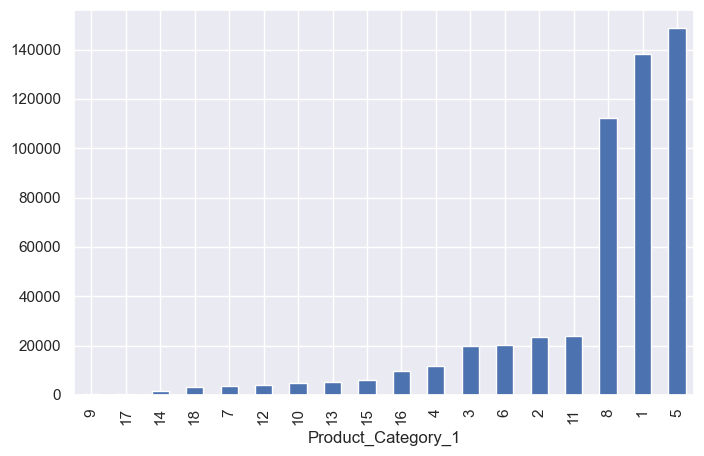

In [97]:
df.groupby('Product_Category_1').size().sort_values().plot.bar()

<Axes: title={'center': 'Pruchase(sum) By Product_Category_1'}, xlabel='Product_Category_1'>

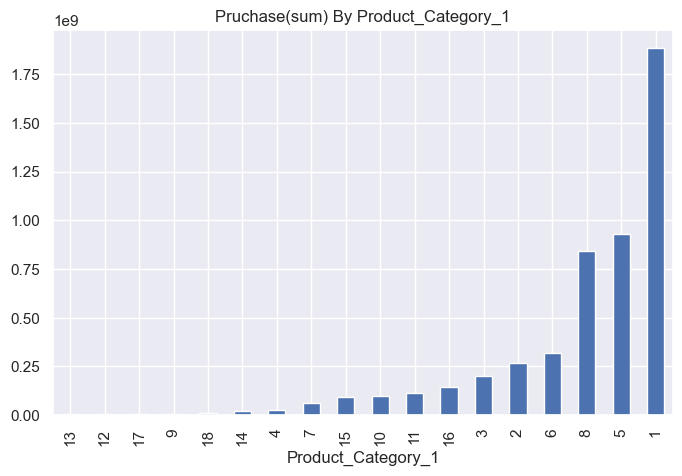

In [100]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot.bar(title = 'Pruchase(sum) By Product_Category_1')

### 5,1 and 8 are most purchased products from the Product_Category_1 .

<Axes: title={'center': 'Pruchase(sum) By Product_Category_1'}, xlabel='Product_Category_1'>

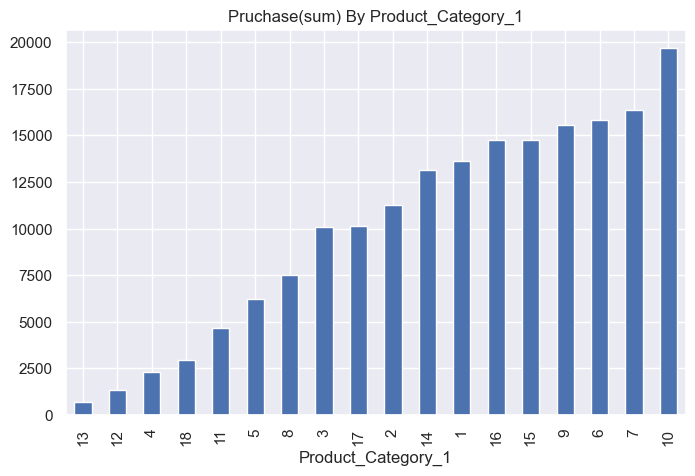

In [101]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot.bar(title = 'Pruchase(sum) By Product_Category_1')

#### 13 is cheapest and 10 is the most expensive product in Category_1

## THE PRODUCTS

<Axes: xlabel='Product_ID'>

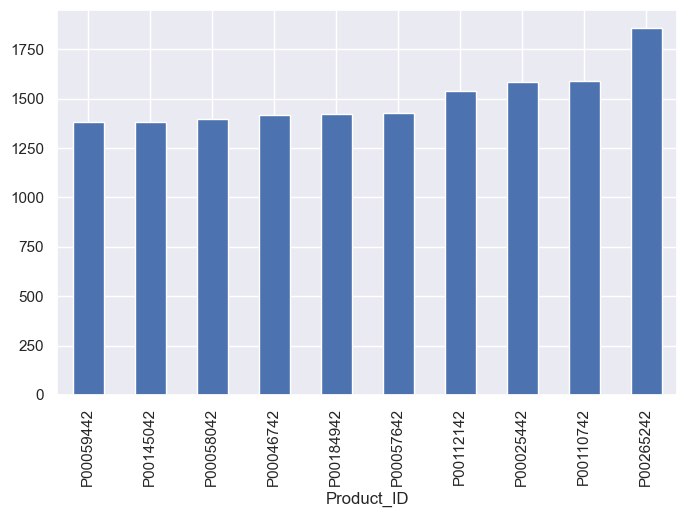

In [103]:
df.groupby('Product_ID')['Purchase'].size().nlargest(10).sort_values().plot.bar()

#### This is the top 10 product where people have Spend Most Of The Money or They have Most Bought.(Quantity)

<Axes: xlabel='Product_ID'>

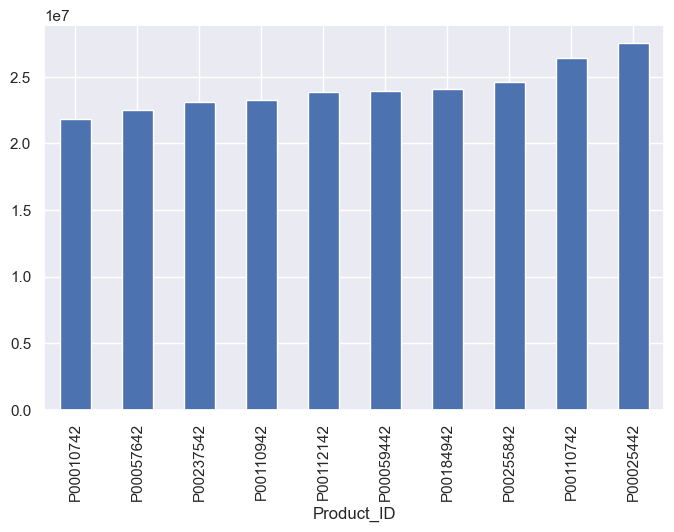

In [105]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot.bar()

#### These are the top 10 Most Selling Products(by Sales)

<Axes: xlabel='Product_ID'>

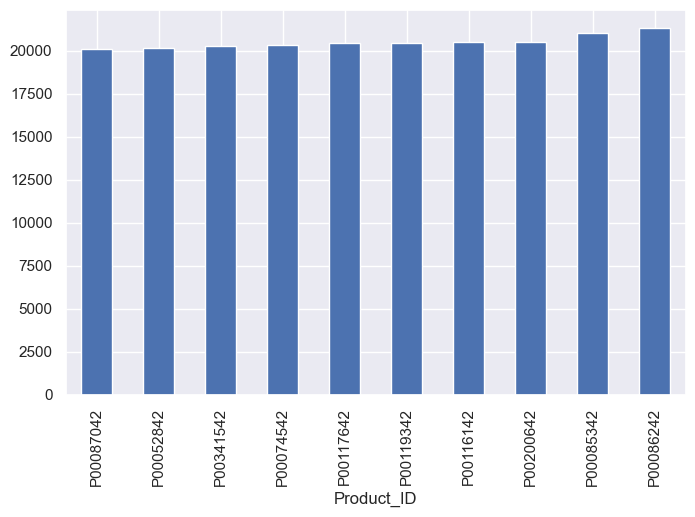

In [106]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot.bar()

#### These are the top 10 Most Expensive Products

<Axes: xlabel='Product_Category_1', ylabel='count'>

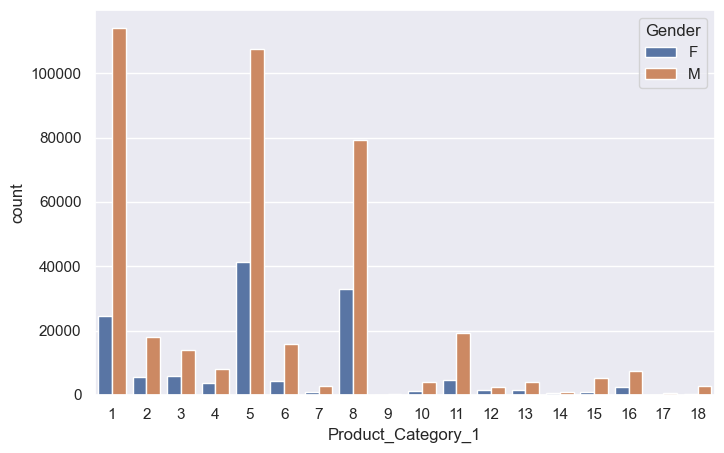

In [107]:
sns.countplot(x='Product_Category_1',hue = 'Gender',data =df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

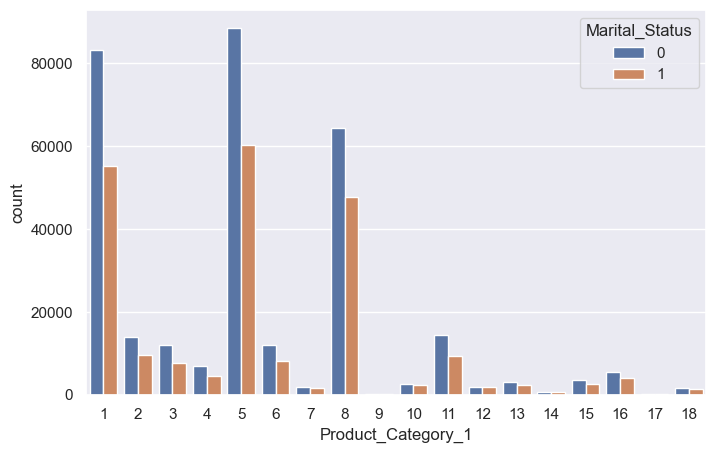

In [108]:
sns.countplot(x='Product_Category_1',hue = 'Marital_Status',data =df)

#### Unmarried Males are Mostly buying 5, 1 and 8 product from Category_1